In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

data = pd.read_csv('Pro Salary.csv')
data.head()

,Survey Year,Timestamp,SalaryUSD,Country,PostalCode,PrimaryDatabase,YearsWithThisDatabase,OtherDatabases,EmploymentStatus,JobTitle,...,HoursWorkedPerWeek,TelecommuteDaysPerWeek,PopulationOfLargestCityWithin20Miles,EmploymentSector,LookingForAnotherJob,CareerPlansThisYear,Gender,OtherJobDuties,KindsOfTasksPerformed,Counter
0,2019,12/14/18 4:22,66 000,Sweden,NaN,Microsoft SQL Server,6,NaN,Full time employee,DBA (Production Focus - build & troubleshoot s...,...,40,"None, or less than 1 day per week",100K-299K (city),Private business,"Yes, but only passively (just curious)","Stay with the same role, but change employers",Male,"DBA (Development Focus - tunes queries, indexe...","Build scripts & automation tools, Manual tasks...",1
1,2018,1/4/18 6:37,50 621,Germany,81829,Microsoft SQL Server,2,"Microsoft SQL Server, MySQL/MariaDB, DB2",Full time employee,DBA (General - splits time evenly between writ...,...,40,"None, or less than 1 day per week",Not Asked,Private business,No,Prefer not to say,Male,NaN,NaN,1
2,2019,12/11/18 9:36,"110, 000",United States,1880,Microsoft SQL Server,2,Oracle,Full time employee,DBA (Production Focus - build & troubleshoot s...,...,44,"None, or less than 1 day per week",300K-1M (large city),Private business,No,"Stay with the same employer, same role",Male,"DBA (Development Focus - tunes queries, indexe...","Build scripts & automation tools, Meetings & m...",1
3,2017,1/5/17 16:49,1450000,United States,Not Asked,Microsoft SQL Server,12,"Microsoft SQL Server, Oracle, Microsoft Access...",Full time employee,Analyst,...,42,"None, or less than 1 day per week",Not Asked,Private business,No,Not Asked,Not Asked,Not Asked,Not Asked,1
4,2018,12/12/17 11:22,1450000,United States,53118,Microsoft SQL Server,20,"Oracle, MongoDB, Microsoft Access, Redis, Azur...",Full time employee,DBA (General - splits time evenly between writ...,...,45,5 or more,Not Asked,Private business,"Yes, but only passively (just curious)","Stay with the same employer, but change roles",Male,"Architect, Data Scientist, Developer: App code...","Build scripts & automation tools, Manual tasks...",1


In [4]:
data.columns

Index(['Survey Year', 'Timestamp', 'SalaryUSD', 'Country', 'PostalCode',
       'PrimaryDatabase', 'YearsWithThisDatabase', 'OtherDatabases',
       'EmploymentStatus', 'JobTitle', 'ManageStaff', 'YearsWithThisTypeOfJob',
       'HowManyCompanies', 'OtherPeopleOnYourTeam', 'CompanyEmployeesOverall',
       'DatabaseServers', 'Education', 'EducationIsComputerRelated',
       'Certifications', 'HoursWorkedPerWeek', 'TelecommuteDaysPerWeek',
       'PopulationOfLargestCityWithin20Miles', 'EmploymentSector',
       'LookingForAnotherJob', 'CareerPlansThisYear', 'Gender',
       'OtherJobDuties', 'KindsOfTasksPerformed', 'Counter'],
      dtype='object')

In [5]:
# Picking out the columns that we want.
clean_data = data[['SalaryUSD','Country','EmploymentStatus','YearsWithThisTypeOfJob','Education','EmploymentSector']]
clean_data.head()

,SalaryUSD,Country,EmploymentStatus,YearsWithThisTypeOfJob,Education,EmploymentSector
0,66 000,Sweden,Full time employee,2,Associates (2 years),Private business
1,50 621,Germany,Full time employee,2,Associates (2 years),Private business
2,"110, 000",United States,Full time employee,1,Bachelors (4 years),Private business
3,1450000,United States,Full time employee,12,Bachelors (4 years),Private business
4,1450000,United States,Full time employee,10,Bachelors (4 years),Private business


In [6]:
# Renaming column header to make it neater
rename_data = clean_data.rename(columns={'YearsWithThisTypeOfJob':'Experience','EmploymentSector':'Employment Sector',
                                        'EmploymentStatus':'Employment Status','SalaryUSD':'Salary'})
rename_data.head()

,Salary,Country,Employment Status,Experience,Education,Employment Sector
0,66 000,Sweden,Full time employee,2,Associates (2 years),Private business
1,50 621,Germany,Full time employee,2,Associates (2 years),Private business
2,"110, 000",United States,Full time employee,1,Bachelors (4 years),Private business
3,1450000,United States,Full time employee,12,Bachelors (4 years),Private business
4,1450000,United States,Full time employee,10,Bachelors (4 years),Private business


In [7]:
# Filtering out all the country except USA
usa_only = rename_data.loc[rename_data['Country'] == 'United States',:]
usa_only.head()

,Salary,Country,Employment Status,Experience,Education,Employment Sector
2,"110, 000",United States,Full time employee,1,Bachelors (4 years),Private business
3,1450000,United States,Full time employee,12,Bachelors (4 years),Private business
4,1450000,United States,Full time employee,10,Bachelors (4 years),Private business
5,1375000,United States,Part time,18,Masters,Private business
6,1000000,United States,Full time employee,20,None (no degree completed),Private business


In [8]:
# Merging employment status to full time employee, Independent, and part time.
usa_only['Employment Status'].value_counts()

Full time employee                                                   4121
Full time employee of a consulting/contracting company                272
Independent consultant, contractor, freelancer,  or company owner      70
Independent or freelancer or company owner                             39
Part time                                                               7
Name: Employment Status, dtype: int64

In [9]:
usa_only['Employment Status'] = usa_only['Employment Status'].replace({'Full time employee of a consulting/contracting company':'Full time employee',
                                                                       'Independent consultant, contractor, freelancer,  or company owner':'Independent',
                                                                       'Independent or freelancer or company owner':'Independent'})

/Users/imanuelgemilang/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  This is separate from the ipykernel package so we can avoid doing imports until


In [10]:
# replace the old variable to new variable to see if everything is merge properly.
usa_only['Employment Status'].value_counts()

Full time employee    4393
Independent            109
Part time                7
Name: Employment Status, dtype: int64

In [21]:
# Dropping the a weird value, which is 110, 000
usa_only = usa_only.drop([2])
usa_only.head()

KeyError: '[2] not found in axis'

In [22]:
# convert salary from string to numeric type
usa_only['Salary'] = pd.to_numeric(usa_only['Salary'])


In [24]:
usa_only['Salary'].min()

92.27

''

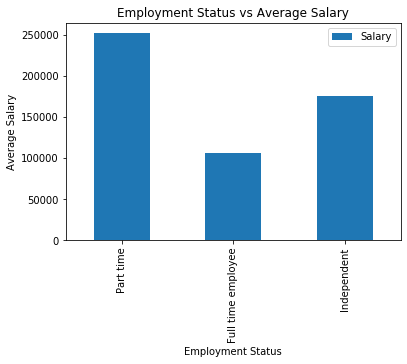

In [44]:
employment_status = usa_only_salaries.groupby('Employment Status').Salary.mean()[['Part time', 'Full time employee', 'Independent']].plot(kind='bar',legend=True)


employment_status.set_ylabel('Average Salary')
employment_status.set_title('Employment Status vs Average Salary')



;

''

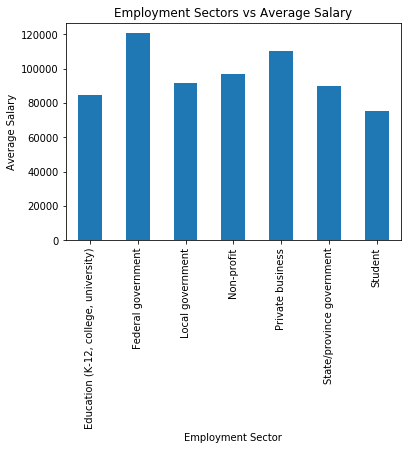

In [49]:
employment_status_1=usa_only_salaries.groupby('Employment Sector').Salary.mean().plot(kind='bar',label=True)

employment_status_1.set_ylabel('Average Salary')
employment_status_1.set_title('Employment Sectors vs Average Salary')
;

''

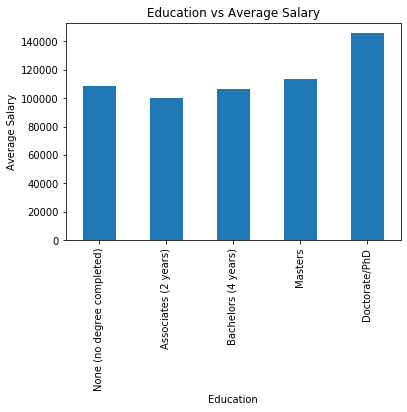

In [50]:
employment_status_2 = usa_only_salaries.groupby('Education').Salary.mean()[['None (no degree completed)',
                                                     'Associates (2 years)',
                                                     'Bachelors (4 years)',
                                                      'Masters',
                                                      'Doctorate/PhD']].plot(kind='bar')

employment_status_2.set_ylabel('Average Salary')
employment_status_2.set_title('Education vs Average Salary')
;